In [2]:
from langchain_community.tools import ArxivQueryRun,WikipediaQueryRun
from langchain_community.utilities import WikipediaAPIWrapper,ArxivAPIWrapper

In [3]:
api_wrapper_arxiv=ArxivAPIWrapper(top_k_results=2,doc_content_chars_max=500)
arxiv=ArxivQueryRun(api_wrapper=api_wrapper_arxiv,description="Query arxiv papers")
print(arxiv. name )

arxiv


In [4]:
arxiv.invoke("Attention is all you need")

"Published: 2024-07-22\nTitle: Attention Is All You Need But You Don't Need All Of It For Inference of Large Language Models\nAuthors: Georgy Tyukin, Gbetondji J-S Dovonon, Jean Kaddour, Pasquale Minervini\nSummary: The inference demand for LLMs has skyrocketed in recent months, and serving\nmodels with low latencies remains challenging due to the quadratic input length\ncomplexity of the attention layers. In this work, we investigate the effect of\ndropping MLP and attention layers at inference time o"

In [5]:
api_wrapper_wiki=WikipediaAPIWrapper (top_k_results=1, doc_content_chars_max=500)
wiki=WikipediaQueryRun(api_wrapper=api_wrapper_wiki)
wiki. name

'wikipedia'

In [6]:
from dotenv import load_dotenv
load_dotenv()
import os
os. environ["TAVILY _API_KEY"]=os.getenv("TAVILY_API_KEY")
os. environ["GROQ API_KEY" ]=os.getenv("GROQ_API_KEY")

In [7]:
from langchain_community.tools.tavily_search import TavilySearchResults

tavily = TavilySearchResults()

In [8]:
tavily.invoke("Recent AI trends")

[{'title': '5 AI Trends Shaping the Future of Public Sector in 2025',
  'url': 'https://cloud.google.com/blog/topics/public-sector/5-ai-trends-shaping-the-future-of-the-public-sector-in-2025',
  'content': "According to a recent Google commissioned IDC study that surveyed 161 federal Chief AI Officers and other AI decision makers, 50% of agencies reported high levels of AI maturity, which corresponds to mature behaviors like embracing an innovation culture and piloting generative AI use cases to drive mission impact.\n\nLet's dive into five AI trends we believe will shape the future of the public sector in the year ahead.\n\nTrend #1: Multimodal AI: Unleashing the power of context [...] Trend #4: AI-powered constituent experience: seamless and personalized\n\nIn 2025, AI will help improve citizen experiences. AI-powered tools and technologies can build trust and foster closer citizen-government relationships by enabling citizens to quickly and easily navigate government websites and se

In [9]:
tools = [arxiv, wiki, tavily]

In [10]:
from langchain_groq import ChatGroq

llm = ChatGroq(model="qwen-qwq-32b")

In [12]:
llm.invoke("What are the recent trends in AI?")

AIMessage(content='\n<think>\nOkay, so I need to figure out the recent trends in AI. Let me start by recalling what I know. AI has been a hot topic for a while, but what\'s new lately? Maybe something with large language models? I remember hearing about GPT-3 and now GPT-4. Oh, and there\'s also stuff like DALL-E for images. But the user is asking for trends, so maybe more recent than that?\n\nHmm, I think there was something about multi-modal models. Those can handle different types of data, like text and images together. Maybe that\'s a trend. Also, I\'ve heard about generative AI being used more in creative fields, like generating art or music. Maybe that\'s part of it.\n\nWait, there was a big deal about the EU\'s AI Act. Is regulation a trend now? I think governments are getting more involved in regulating AI to prevent misuse. So maybe regulatory frameworks are a trend. Also, ethical AI, like making sure algorithms are fair and don\'t have biases. That\'s important too.\n\nEdge A

In [13]:
lllm_with_tools = llm.bind_tools(tools=tools)

In [14]:
llm.invoke("What are the recent trends in AI?")

AIMessage(content='\n<think>\nOkay, so I need to figure out the recent trends in AI. Let me start by recalling what I know. I remember hearing about things like large language models, maybe like GPT or something. Oh right, those are the big models that can generate text. But that\'s been around for a while. Maybe there\'s something newer? I think there\'s been a lot about AI in healthcare, like helping with diagnoses. Also, maybe something with computer vision? I heard about self-driving cars, but is that still a trend or has it moved on?\n\nWait, I think there\'s been a focus on AI ethics and regulation. Companies are getting more concerned about bias in algorithms and privacy issues. That might be a trend. Also, maybe generative AI, like creating images or videos? Oh, like DALL-E or Midjourney? Those have been popular. \n\nOh, and there\'s something about reinforcement learning and how that\'s being applied in robotics or games. Maybe AlphaGo was a big deal, but is there more recent 

In [15]:
from typing_extensions import TypedDict
from langchain_core.messages import AnyMessage
from typing import Annotated
from langgraph.graph.message import add_messages

In [16]:
class State(TypedDict):
    messages: list[Annotated[list[AnyMessage], add_messages]]

In [17]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

In [18]:
def tool_calling_1lm(state:State):
   return {"messages": [lllm_with_tools.invoke(state["messages"])]}

builder = StateGraph(State)
builder.add_node("tool_calling_11m", tool_calling_1lm)
builder.add_node("tools", ToolNode(tools))

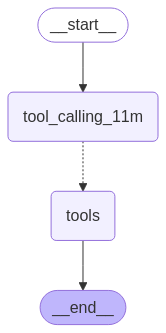

In [19]:
builder.add_edge(START, "tool_calling_11m")
builder.add_conditional_edges(
   "tool_calling_11m",
   tools_condition)
builder.add_edge("tools", END)

graph = builder.compile()
display(Image(graph.get_graph().draw_mermaid_png()))

In [23]:
messages=graph.invoke({"messages":"What are the recent trends in AI?"})
for m in messages ['messages']:
   m.pretty_print()

================================= Tool Message =================================
Name: arxiv

Published: 2024-09-30
Title: AI versus AI in Financial Crimes and Detection: GenAI Crime Waves to Co-Evolutionary AI
Authors: Eren Kurshan, Dhagash Mehta, Bayan Bruss, Tucker Balch
Summary: Adoption of AI by criminal entities across traditional and emerging financial
crime paradigms has been a disturbing recent trend. Particularly concerning is
the proliferation of generative AI, which has empowered criminal activities
ranging from sophisticated phishing schemes to the creation of hard-to-detect
================================= Tool Message =================================
Name: tavily_search_results_json

[{"title": "11 New Technologies in AI: All Trends of 2023-2024 - devabit", "url": "https://devabit.com/blog/top-11-new-technologies-in-ai-exploring-the-latest-trends/", "content": "A recent LinkedIn US Executive Confidence Index Survey from June 2023 reflects an optimistic outlook: 47% of 